# Initial Setup

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'imblearn'

Import Processed data as Samples

In [2]:
samples = pd.read_csv("data/processed/samples.csv", encoding="latin-1")

In [3]:
samples = samples.drop("Unnamed: 0", axis=1)
samples.head()

,establishments,employees,growth,exemptions_stay,exemptions_in_is,exemptions_in_oos,exemptions_out_is,exemptions_out_oos,returns_stay,returns_in_is,returns_in_oos,returns_out_is,returns_out_oos,agi_stay,agi_in_is,agi_in_oos,agi_out_is,agi_out_oos
0,35,157,False,35901.0,2185.0,4184.0,1883.0,3338.0,15062.0,951.0,1410.0,853.0,1245.0,714261.0,32399.0,73510.0,26576.0,59705.0
1,34,175,False,36850.0,2519.0,4209.0,2102.0,3545.0,15473.0,1139.0,1551.0,971.0,1307.0,756692.0,38883.0,82027.0,31657.0,70658.0
2,30,109,True,37767.0,2394.0,4168.0,2127.0,3443.0,15944.0,1072.0,1447.0,1025.0,1284.0,827611.0,37153.0,79737.0,36112.0,67092.0
3,38,116,False,39518.0,2548.0,3863.0,2047.0,3601.0,16791.0,1185.0,1458.0,989.0,1398.0,901200.0,43332.0,83366.0,34063.0,69089.0
4,37,0,False,40719.0,2230.0,3873.0,2118.0,3660.0,17385.0,1038.0,1462.0,1018.0,1375.0,936888.0,36050.0,79697.0,34539.0,75861.0


Split off a hold-out test set of data

In [4]:
y = samples["growth"]
X = samples.drop("growth", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=36)

# Models
## Model 1: Logistic Regression

In [ ]:
# define steps and hyperparameter ranges
steps_1 = [("scaler", preprocessing.StandardScaler()),
        ("pca", PCA()),
        ("model", LogisticRegression())]
parameters_1 = {"pca__n_components":np.arange(16,18),
               "model__C": [0.01, 0.1, 1, 10, 100],
                "model__class_weight": ["balanced"],
               "model__solver": ["liblinear", "newton-cg", "sag", "lbfgs"]}

In [ ]:
# create pipeline and train model
pipeline_1 = Pipeline(steps_1)
cv_1 = GridSearchCV(pipeline_1, parameters_1, return_train_score=True)
cv_1.fit(X_train, y_train)
y_pred_1 = cv_1.predict(X_test)

In [37]:
# score the model
print("Best Score:", cv_1.score(X_test, y_test))
print("Best Params:", cv_1.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_1))

Best Score: 0.647867600255
Best Params: {'model__C': 1001, 'model__class_weight': 'balanced', 'model__solver': 'sag', 'pca__n_components': 17}
Classification Report:
             precision    recall  f1-score   support

      False       0.69      0.82      0.75      5044
       True       0.51      0.33      0.40      2811

avg / total       0.63      0.65      0.63      7855



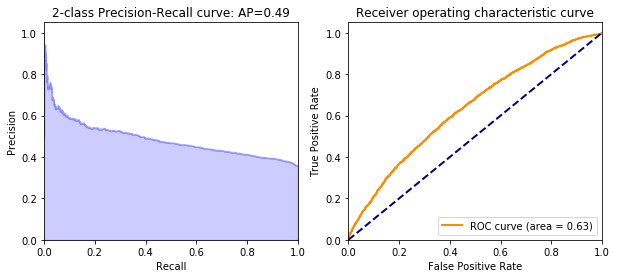

In [9]:
#more statistics to compute for graphing
y_score_1 = cv_1.decision_function(X_test)
precision_1, recall_1, _ = precision_recall_curve(y_test, y_score_1)
average_precision_1 = average_precision_score(y_test, y_score_1)
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_score_1, pos_label=1)


#plot precision-recall curve and receiver operating characteristic
plt.figure(figsize=(10,4))
plt.subplot(121)  # 1 row, 2 columns, Plot 1
plt.step(recall_1, precision_1, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_1, precision_1, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_1))

plt.subplot(122)  # 1 row, 2 columns, Plot 2
plt.plot(fpr_1, tpr_1, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc(fpr_1, tpr_1))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

## Model 2: Nearest Neighbors

In [10]:
# define steps and hyperparameter ranges
steps_2 = [("scaler", preprocessing.StandardScaler()),
        ("pca", PCA()),
        ("model", KNeighborsClassifier())]
parameters_2 = {"pca__n_components":np.arange(1,18),
             "model__n_neighbors":np.arange(1,10)}

In [11]:
# create pipeline and train model
pipeline_2 = Pipeline(steps_2)
cv_2 = GridSearchCV(pipeline_2, parameters_2)
cv_2.fit(X_train, y_train)
y_pred_2 = cv_2.predict(X_test)

In [12]:
#score the model
print("Best Score:", cv_2.score(X_test, y_test))
print("Best Params:", cv_2.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_2))

Best Score: 0.624188415022
Best Params: {'model__n_neighbors': 8, 'pca__n_components': 4}
Classification Report:
             precision    recall  f1-score   support

      False       0.66      0.87      0.75      5044
       True       0.44      0.18      0.26      2811

avg / total       0.58      0.62      0.57      7855



## Model 3: Naive Bayes

In [13]:
# define steps and hyperparameter ranges
steps_3 = [("scaler", preprocessing.StandardScaler()),
        ("pca", PCA()),
        ("model", GaussianNB())]
parameters_3 = {"pca__n_components":np.arange(1,18)}

In [14]:
# create pipeline and train model
pipeline_3 = Pipeline(steps_3)
cv_3 = GridSearchCV(pipeline_3, parameters_3)
cv_3.fit(X_train, y_train)
y_pred_3 = cv_3.predict(X_test)

In [15]:
#score the model
print("Best Score:", cv_3.score(X_test, y_test))
print("Best Params:", cv_3.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_3))

Best Score: 0.64455760662
Best Params: {'pca__n_components': 11}
Classification Report:
             precision    recall  f1-score   support

      False       0.65      0.95      0.77      5044
       True       0.52      0.11      0.17      2811

avg / total       0.61      0.64      0.56      7855



## Model 4: Random Forest

In [16]:
# define steps and hyperparameter ranges
steps_4 = [("scaler", preprocessing.StandardScaler()),
        ("pca", PCA()),
        ("model", RandomForestClassifier())]
parameters_4 = {"pca__n_components":np.arange(10,18),
             "model__n_estimators":[50],
             "model__max_features":["sqrt", "log2"],
             "model__min_samples_leaf":[20, 30, 40]}

In [17]:
# create pipeline and train model
pipeline_4 = Pipeline(steps_4)
cv_4 = GridSearchCV(pipeline_4, parameters_4)
cv_4.fit(X_train, y_train)
y_pred_4 = cv_4.predict(X_test)

In [18]:
#score the model
print("Best Score:", cv_4.score(X_test, y_test))
print("Best Params:", cv_4.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_4))

Best Score: 0.660343730108
Best Params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 40, 'model__n_estimators': 50, 'pca__n_components': 16}
Classification Report:
             precision    recall  f1-score   support

      False       0.67      0.92      0.78      5044
       True       0.58      0.19      0.28      2811

avg / total       0.64      0.66      0.60      7855



## Model 5: Support Vector Machine

In [19]:
# define steps and hyperparameter ranges
steps_5 = [("scaler", preprocessing.StandardScaler()),
        ("pca", PCA()),
        ("model", SVC())]
parameters_5 = {"pca__n_components":np.arange(10,18),
             "model__C":[0.01, 0.1, 1, 10]}

In [20]:
# create pipeline and train model
pipeline_5 = Pipeline(steps_5)
cv_5 = GridSearchCV(pipeline_5, parameters_5)
cv_5.fit(X_train, y_train)
y_pred_5 = cv_5.predict(X_test)

In [21]:
#score the model
print("Best Score:", cv_5.score(X_test, y_test))
print("Best Params:", cv_5.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_5))

Best Score: 0.655378739656
Best Params: {'model__C': 10, 'pca__n_components': 17}
Classification Report:
             precision    recall  f1-score   support

      False       0.66      0.97      0.78      5044
       True       0.62      0.10      0.17      2811

avg / total       0.64      0.66      0.56      7855



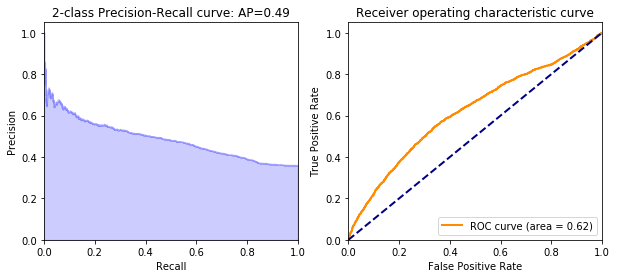

In [22]:
#more statistics to compute for graphing
y_score_5 = cv_5.decision_function(X_test)
precision_5, recall_5, _ = precision_recall_curve(y_test, y_score_5)
average_precision_5 = average_precision_score(y_test, y_score_5)
fpr_5, tpr_5, thresholds_5 = roc_curve(y_test, y_score_5, pos_label=1)


#plot precision-recall curve and receiver operating characteristic
plt.figure(figsize=(10,4))
plt.subplot(121)  # 1 row, 2 columns, Plot 1
plt.step(recall_5, precision_5, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_5, precision_5, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_5))

plt.subplot(122)  # 1 row, 2 columns, Plot 2
plt.plot(fpr_5, tpr_5, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc(fpr_5, tpr_5))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

# Intepretation